In [1]:
import os
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

# Loading data

In [2]:
activity_df = pd.read_csv("../data/model_data_subset.csv", delimiter=";")
activity_df.dropna(subset=["Label"], inplace=True)
activity_df["Label"] = activity_df["Label"].str.capitalize()
activity_df.head()

,CompoundID,Label,Hf_Hf_d1,Hf_Hf_d2,Hf_Hf_d3,Hf_Hf_d4,Hf_Hf_d5,Hf_Hf_d6,Hf_Hf_d7,Hf_Hf_d8,...,NumAromaticRings,NumSaturatedRings,NumAliphaticRings,NumAromaticHeterocycles,NumSaturatedHeterocycles,NumAliphaticHeterocycles,NumAromaticCarbocycles,NumSaturatedCarbocycles,NumAliphaticCarbocycles,FractionCSP3
0,SPE_K28007504,Active,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2,0,0,1,0,0,1,0,0,0.272727
1,SPE_K59711701,Active,0.0,0.0,0.3,1.3,0.3,0.0,0.0,0.0,...,1,2,2,0,0,0,1,2,2,0.600000
2,SPE_K44400149,Active,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3,0,0,1,0,0,2,0,0,0.250000
3,SPE_K47659338,Active,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2,0,1,1,0,1,1,0,0,0.285714
4,SPE_K18779551,Active,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2,0,0,0,0,0,2,0,0,0.333333


In [3]:
numcols = activity_df.columns[2:]  # first two columns are not numerical

In [4]:
activity_df["Label"].value_counts()

Label
Inactive    4200
Active        58
Name: count, dtype: int64

# Distribution of the label class

In [5]:
figure_dir = "../figures"
os.makedirs(figure_dir, exist_ok=True)

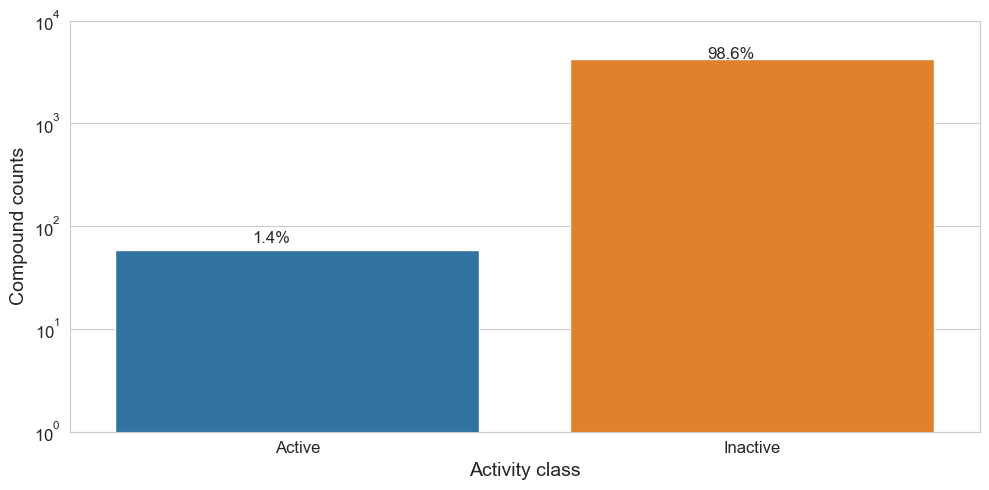

In [6]:
sns.set_style("whitegrid")
plt.figure(figsize=(10, 5))
ax = sns.countplot(data=activity_df, x="Label", hue="Label")
plt.ylabel("Compound counts", fontsize=14)
plt.xlabel("Activity class", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.yscale("log")
plt.ylim(1, 10**4)
# add percentage labels on top of the horizontal bars
total = len(activity_df)
for p in ax.patches:
    percentage = "{:.1f}%".format(100 * p.get_height() / total)
    x = p.get_x() + p.get_width() / 2 - 0.1
    y = p.get_height() + 10
    ax.annotate(percentage, (x, y), fontsize=12)

plt.tight_layout()
plt.savefig("../figures/supplementary_figure_1.png", dpi=400)
plt.show()

# Chemical space distribution with t-SNE

In [7]:
X = activity_df[numcols]
y = activity_df["Label"]

In [8]:
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Create and fit t-SNE model
tsne_model = TSNE(
    n_components=2,
    random_state=1206,
    perplexity=30,
    max_iter=10000,
    init="pca",
    learning_rate="auto",
)
tsne_result = tsne_model.fit_transform(X_scaled)

In [9]:
tsne_df = pd.DataFrame(data=tsne_result, columns=["tSNE1", "tSNE2"])
tsne_df["Class"] = y

In [10]:
fig = px.scatter(
    tsne_df,
    x="tSNE1",
    y="tSNE2",
    color="Class",
    color_discrete_sequence=px.colors.qualitative.Set1,
    title="t-SNE Projection of ErG fingeprint and Chemphys descriptors for PLD dataset",
    height=1000,  # Set the height of the plot
    width=1200,
)  # Set the width of the plot
fig.update_traces(marker_size=7)
fig.show()

In [11]:
fig.write_image("../figures/figure_1.png")